In [522]:
import nltk
from nltk.book import *
from nltk.corpus import gutenberg, brown, webtext, nps_chat, reuters, inaugural,udhr,stopwords
import matplotlib.pyplot as plt
from nltk.corpus import PlaintextCorpusReader

### gutenberg corpus

In [2]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
gutenberg.words('edgeworth-parents.txt')

['[', 'The', 'Parent', "'", 's', 'Assistant', ',', ...]

In [4]:
gutenberg.raw('edgeworth-parents.txt')

'[The Parent\'s Assistant, by Maria Edgeworth]\r\n\r\n\r\nTHE ORPHANS.\r\n\r\nNear the ruins of the castle of Rossmore, in Ireland, is a small cabin,\r\nin which there once lived a widow and her four children.  As long as she\r\nwas able to work, she was very industrious, and was accounted the best\r\nspinner in the parish; but she overworked herself at last, and fell ill,\r\nso that she could not sit to her wheel as she used to do, and was obliged\r\nto give it up to her eldest daughter, Mary.\r\n\r\nMary was at this time about twelve years old.  One evening she was\r\nsitting at the foot of her mother\'s bed spinning, and her little brothers\r\nand sisters were gathered round the fire eating their potatoes and milk\r\nfor supper.  "Bless them, the poor young creatures!" said the widow, who,\r\nas she lay on her bed, which she knew must be her deathbed, was thinking\r\nof what would become of her children after she was gone.  Mary stopped\r\nher wheel, for she was afraid that the nois

In [5]:
gutenberg.sents('edgeworth-parents.txt')

[['[', 'The', 'Parent', "'", 's', 'Assistant', ',', 'by', 'Maria', 'Edgeworth', ']'], ['THE', 'ORPHANS', '.'], ...]

### Webtext and nps chat corpus

In [9]:
for i in webtext.fileids():
    print(f'{i}:    num of tokens:{len(webtext.words(i))}')

firefox.txt:    num of tokens:102457
grail.txt:    num of tokens:16967
overheard.txt:    num of tokens:218413
pirates.txt:    num of tokens:22679
singles.txt:    num of tokens:4867
wine.txt:    num of tokens:31350


In [10]:
for i in nps_chat.fileids():
    print(f'{i}:    num of tokens:{len(nps_chat.words(i))}')

10-19-20s_706posts.xml:    num of tokens:2829
10-19-30s_705posts.xml:    num of tokens:3157
10-19-40s_686posts.xml:    num of tokens:2931
10-19-adults_706posts.xml:    num of tokens:3777
10-24-40s_706posts.xml:    num of tokens:2981
10-26-teens_706posts.xml:    num of tokens:3424
11-06-adults_706posts.xml:    num of tokens:2745
11-08-20s_705posts.xml:    num of tokens:2795
11-08-40s_706posts.xml:    num of tokens:2548
11-08-adults_705posts.xml:    num of tokens:3063
11-08-teens_706posts.xml:    num of tokens:2398
11-09-20s_706posts.xml:    num of tokens:3297
11-09-40s_706posts.xml:    num of tokens:3477
11-09-adults_706posts.xml:    num of tokens:2806
11-09-teens_706posts.xml:    num of tokens:2782


In [10]:
nps_chat.posts('10-19-20s_706posts.xml')   # basically like sents

[['now', 'im', 'left', 'with', 'this', 'gay', 'name'], [':P'], ...]

### brown corpus

In [11]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [18]:
news_text = brown.words(categories='news')
fdist = nltk.probability.FreqDist(i.lower() for i in news_text)
fdist

FreqDist({'the': 6386, ',': 5188, '.': 4030, 'of': 2861, 'and': 2186, 'to': 2144, 'a': 2130, 'in': 2020, 'for': 969, 'that': 829, ...})

In [20]:
fdist.most_common(10)

[('the', 6386),
 (',', 5188),
 ('.', 4030),
 ('of', 2861),
 ('and', 2186),
 ('to', 2144),
 ('a', 2130),
 ('in', 2020),
 ('for', 969),
 ('that', 829)]

In [22]:
modal = ['can','could','may','might','must','will']
for i in modal:
    print(f"count of {i}:   {fdist.get(i)}")

count of can:   94
count of could:   87
count of may:   93
count of might:   38
count of must:   53
count of will:   389


In [32]:
for j in ['news','romance','religion','hobbies','humor']:
    fdist = nltk.probability.FreqDist(i.lower() for i in brown.words(categories=j))
    print(f"Category : {j}")
    for i in modal:
        print(f"{i} : {fdist.get(i)}",end=' ')
    print('\n')

Category : news
can : 94 could : 87 may : 93 might : 38 must : 53 will : 389 

Category : romance
can : 79 could : 195 may : 11 might : 51 must : 46 will : 49 

Category : religion
can : 84 could : 59 may : 79 might : 12 must : 54 will : 72 

Category : hobbies
can : 276 could : 59 may : 143 might : 22 must : 84 will : 269 

Category : humor
can : 17 could : 33 may : 8 might : 8 must : 9 will : 13 



In [35]:
wh_words = ['what','when','where','who','why']
for j in ['news','romance','religion','hobbies','humor']:
    fdist = nltk.probability.FreqDist(i.lower() for i in brown.words(categories=j))
    print(j)
    for i in wh_words:
        print(f"{i}: {fdist.get(i)}",end=' ')
    print('\n')

news
what: 95 when: 169 where: 59 who: 268 why: 14 

romance
what: 171 when: 163 where: 58 who: 95 why: 62 

religion
what: 86 when: 68 where: 21 who: 102 why: 20 

hobbies
what: 108 when: 164 where: 77 who: 104 why: 17 

humor
what: 46 when: 62 where: 16 who: 49 why: 13 



##### cfd for above brown corpus

In [42]:
cfd = nltk.ConditionalFreqDist(
    (genre,word)
    for genre in ['news','romance','religion','hobbies','humor']
    for word in [w.lower() for w in brown.words(categories=genre)]
)

In [43]:
cfd.tabulate()

                                         !                              $.03                         $.054/mbf                          $.07/cwt                     $.10-a-minute                             $.105                              $.12                              $.30                          $.30/mbf                              $.50                              $.65                              $.75                              $.80                              $.86                              $.90                                $1                            $1,000                    $1,000,000,000                            $1,500                        $1,500,000                            $1,600                            $1,800                             $1.00                              $1.1                             $1.10                             $1.26                              $1.4                              $1.5                             $1.65      

In [44]:
cfd.tabulate(samples=['can','could','may','might','must','will'])

           can could   may might  must  will 
 hobbies   276    59   143    22    84   269 
   humor    17    33     8     8     9    13 
    news    94    87    93    38    53   389 
religion    84    59    79    12    54    72 
 romance    79   195    11    51    46    49 


In [45]:
cfd.tabulate(samples=['what','when','where','who','why'])

          what  when where   who   why 
 hobbies   108   164    77   104    17 
   humor    46    62    16    49    13 
    news    95   169    59   268    14 
religion    86    68    21   102    20 
 romance   171   163    58    95    62 


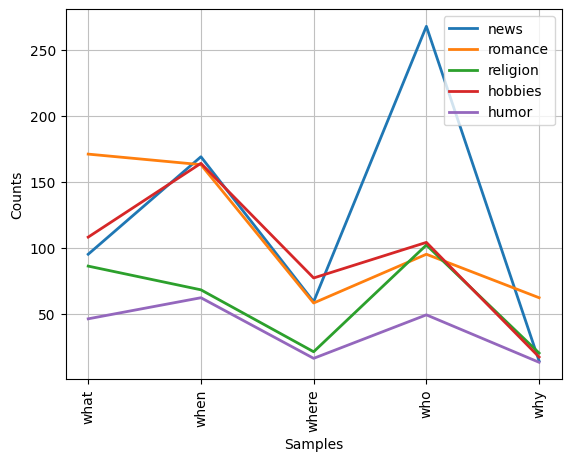

<Axes: xlabel='Samples', ylabel='Counts'>

In [47]:
cfd.plot(samples=['what','when','where','who','why'])

### Reuters Corpus

In [51]:
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [52]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [55]:
reuters.categories('test/14867')

['jobs']

In [56]:
reuters.words('test/14867')

['GERMAN', 'INDUSTRIAL', 'EMPLOYMENT', 'SEEN', ...]

In [57]:
reuters.categories(['test/14867','test/14865'])

['acq', 'jobs']

In [58]:
reuters.words(['test/14867','test/14865'])

['GERMAN', 'INDUSTRIAL', 'EMPLOYMENT', 'SEEN', ...]

### inaugural address corpus

In [60]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [61]:
inaugural_years = [i[:4] for i in inaugural.fileids()]

In [98]:
inaugural_years[1]

'1793'

In [102]:
for fileid in inaugural.fileids():
    fdist = nltk.FreqDist([w.lower() for w in inaugural.words(fileid)])
    print(fdist.get('america'))

None
1
5
None
None
None
None
None
2
None
None
None
1
None
None
None
None
1
None
None
None
None
None
1
None
None
None
None
None
None
4
None
2
15
8
6
None
1
7
1
None
3
5
2
3
6
21
2
6
7
7
19
15
11
20
10
8
20
20


In [194]:
cfd = nltk.ConditionalFreqDist(
    (target,file[:4])
    for file in inaugural.fileids()
    for word in inaugural.words(file) 
    for target in ['america','citizen'] 
    if word.lower().startswith(target)
)

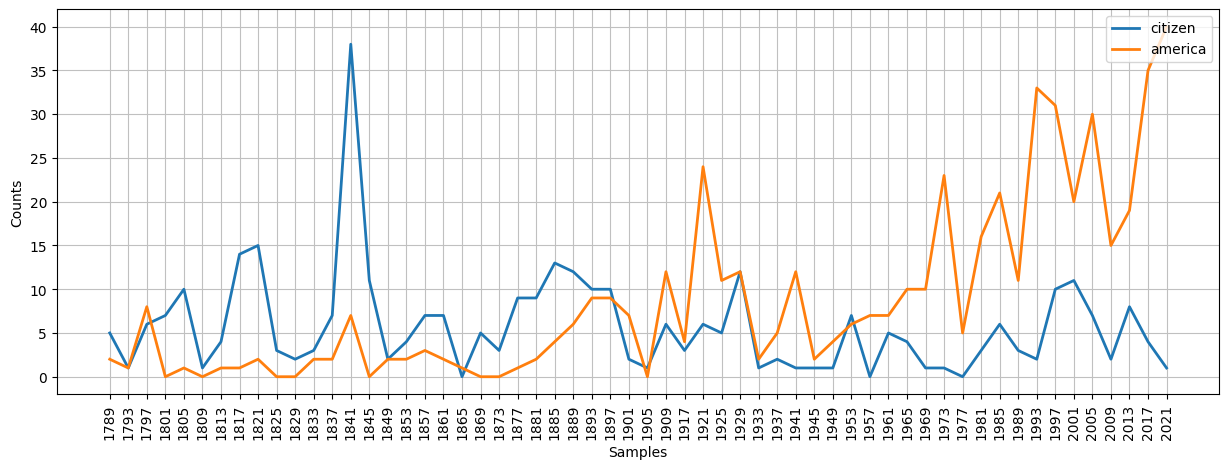

<Axes: xlabel='Samples', ylabel='Counts'>

In [195]:
plt.figure(figsize=[15,5])
cfd.plot()

### brown corpus

In [203]:
genre = ['news','romance']
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [208]:
cfd = nltk.ConditionalFreqDist(
    (gen,day)
    for gen in genre
    for word in brown.words(categories=gen)
    for day in days
    if word.lower()==day.lower()
)

In [209]:
cfd.tabulate()

           Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
   news        41        54        33        51        20        43        22 
romance         3         2         4         5         1         3         3 


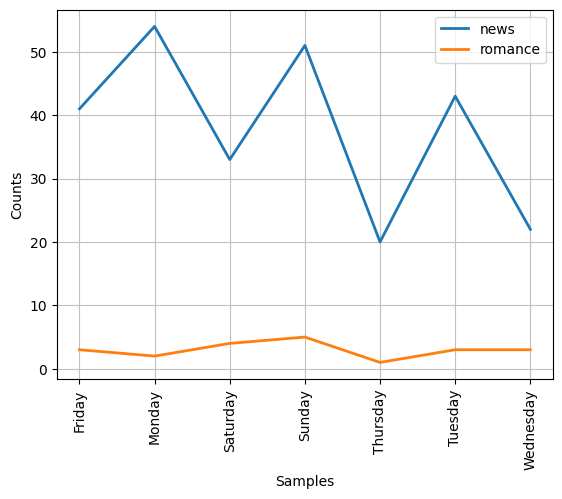

<Axes: xlabel='Samples', ylabel='Counts'>

In [210]:
cfd.plot()

### udhr corpus

In [213]:
udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [257]:
cfd = nltk.ConditionalFreqDist(
    (lang.split('-Latin1')[0], len(word))
    for lang in udhr.fileids()
    for word in udhr.words(lang)
    #if len(word) <10  if lang.split('-Latin1')[0] in ['English','German_Deutsch'] 
)

In [258]:
cfd.tabulate(conditions=['English','German_Deutsch'] )

                 1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21 
       English 185 340 358 114 169 117 157 118  80  63  50  12  11   6   1   0   0   0   0   0   0 
German_Deutsch 171  92 351 103 177 119  97 103  62  58  53  32  27  29  15  14   3   7   5   2   1 


In [288]:
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in udhr.fileids()
    for word in udhr.words(lang)
    if len(word)<10
    for target in ['English','German_Deutsch']
    if lang.lower().startswith(target.lower())
)
cfd.tabulate(cumulative=True)

                         1    2    3    4    5    6    7    8    9 
       English-Latin1  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch-Latin1  171  263  614  717  894 1013 1110 1213 1275 


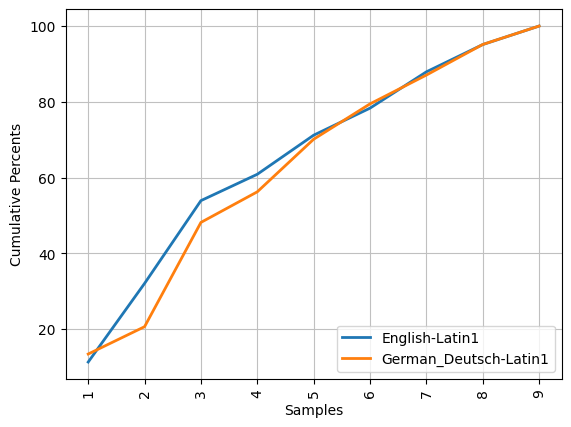

<Axes: xlabel='Samples', ylabel='Cumulative Percents'>

In [291]:
cfd.plot(cumulative=True,percents=True)

In [283]:
# the same above thing can be done 
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in udhr.fileids()
    for word in udhr.words(lang)
    for target in ['English','German_Deutsch']
    if lang.lower().startswith(target.lower())
)
cfd.tabulate(samples = range(1,10),cumulative=True)

                         1    2    3    4    5    6    7    8    9 
       English-Latin1  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch-Latin1  171  263  614  717  894 1013 1110 1213 1275 


### Loading your own corpus

In [511]:
corpus_root_folder = '/home/snehil/snehi/Desktop/Data/reddit'
file_pattern = 'indiacoffee_comments.txt'

reddit = PlaintextCorpusReader(corpus_root_folder,file_pattern)

In [512]:
reddit.words()

['|', 'body', '|', ...]

In [513]:
reddit.sents()

[['|', 'body', '|', '|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [332]:
cfd = nltk.ConditionalFreqDist(
    (genre,words)
    for genre in brown.categories()
    for words in brown.words(categories=genre)
    if len(words) > 7
)

In [333]:
genre_word = [(genre,words)
    for genre in ['news','romance']
    for words in brown.words(categories=genre)]

In [334]:
genre_word[:10]

[('news', 'The'),
 ('news', 'Fulton'),
 ('news', 'County'),
 ('news', 'Grand'),
 ('news', 'Jury'),
 ('news', 'said'),
 ('news', 'Friday'),
 ('news', 'an'),
 ('news', 'investigation'),
 ('news', 'of')]

In [335]:
genre_word[-10:]

[('romance', 'Washington'),
 ('romance', 'episode'),
 ('romance', "''"),
 ('romance', '.'),
 ('romance', '``'),
 ('romance', "I'm"),
 ('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

In [336]:
cfd.conditions()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [337]:
cfd['romance'].most_common(20)

[('something', 59),
 ("couldn't", 46),
 ('anything', 42),
 ("wouldn't", 33),
 ('everything', 27),
 ('beautiful', 25),
 ('together', 25),
 ('thinking', 24),
 ('suddenly', 22),
 ('business', 21),
 ('watching', 20),
 ('children', 20),
 ('Henrietta', 20),
 ('Alexander', 20),
 ('happened', 19),
 ('breakfast', 16),
 ('standing', 16),
 ('Anniston', 15),
 ('remember', 14),
 ('American', 14)]

In [338]:
cfd['news'].most_common(20)

[('President', 89),
 ('American', 67),
 ('yesterday', 56),
 ('president', 53),
 ('administration', 52),
 ('government', 52),
 ('Washington', 48),
 ('children', 45),
 ('University', 42),
 ('business', 42),
 ('expected', 40),
 ('National', 40),
 ('election', 38),
 ('committee', 38),
 ('Committee', 37),
 ('announced', 37),
 ('Democratic', 37),
 ('chairman', 35),
 ('received', 33),
 ('Saturday', 33)]

### genrating random text with bigrams

In [558]:
# created bigrams
bigrams = nltk.bigrams([word.lower() for word in reddit.words() if len(word)>1])

In [559]:
#list(bigrams)

In [560]:
# creating freq distribution for each word
cfd = nltk.ConditionalFreqDist(bigrams)

In [561]:
cfd['coffee']

FreqDist({'is': 228, 'and': 192, 'in': 110, 'from': 100, 'with': 94, 'to': 93, 'for': 84, 'roasters': 84, 'beans': 78, 'but': 68, ...})

In [562]:
def generate_model(cfdist,word,num=15):
    for i in range(num):
        print(word,end = ' ')
        word = cfdist[word].max()

In [563]:
generate_model(cfd,'monsoon')

monsoon malabar from the coffee is the coffee is the coffee is the coffee is 

In [469]:
cfd['this'].max()

'coffee'

In [464]:
sorted(dict(cfd['monsoon']).items(), key=lambda x:x[1],reverse=True)

[('malabar', 19),
 ('personally', 1),
 ('maalabar', 1),
 ('baarbara', 1),
 ('arrange', 1),
 ('deleted', 1)]

In [446]:
from collections import Counter
sorted(dict(Counter(reddit.words())).items(), key=lambda x:x[-1],reverse=True)

[('|', 19978),
 ('.', 17653),
 ('the', 9994),
 (',', 9297),
 ('I', 8909),
 ('a', 7559),
 ("'", 6672),
 ('to', 6479),
 ('and', 5962),
 ('it', 5614),
 ('you', 5268),
 ('for', 4421),
 ('coffee', 4126),
 ('of', 4086),
 ('is', 4008),
 ('in', 3230),
 ('-', 2966),
 ('/', 2758),
 ('that', 2742),
 ('s', 2647),
 ('with', 2465),
 ('t', 2364),
 ('have', 2176),
 ('?', 2044),
 ('on', 2030),
 ('but', 1799),
 ('this', 1680),
 ('can', 1641),
 ('are', 1617),
 ('from', 1566),
 ('be', 1552),
 ('¶¶', 1475),
 ('not', 1440),
 ('!', 1429),
 ('as', 1398),
 ('like', 1368),
 ('my', 1346),
 ('good', 1280),
 ('or', 1276),
 ('(', 1275),
 ('if', 1251),
 ('’', 1250),
 ('was', 1244),
 ('get', 1185),
 ('.¶¶', 1174),
 ('one', 1142),
 ('your', 1130),
 ('so', 1099),
 ('will', 1060),
 ('they', 1054),
 ('at', 1051),
 ('just', 993),
 ('more', 938),
 ('i', 935),
 ('out', 935),
 (')', 921),
 ('It', 909),
 ('me', 895),
 ('do', 849),
 ('an', 838),
 ('://', 837),
 ('try', 835),
 ('https', 820),
 ('don', 805),
 ('¶', 804),
 ('use'

In [510]:
nltk.corpus.words.words()

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'aba',
 'Ababdeh',
 'Ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'Abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'Abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'Abanic',
 'Abantes',
 'abaptiston',
 'Abarambo',
 'Abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'Abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'Abassin',
 'abastardize',
 'abatable',
 'abate

### Wordlist corpora

#### adding stopwords to reddit text corpus

In [564]:
reddit.words()

['|', 'body', '|', ...]

In [565]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [568]:
reddit_mod = [w for w in reddit.words() if (w not in stopwords.words('english') and len(w)>1)]

In [569]:
bigrams = nltk.bigrams(reddit_mod)

In [570]:
cfd_sp = nltk.ConditionalFreqDist(bigrams)

In [571]:
cfd_sp['coffee']

FreqDist({'beans': 78, 'roasters': 49, '¶¶': 38, 'water': 37, 'get': 36, '.¶¶': 36, 'like': 34, 'It': 31, 'good': 29, 'milk': 26, ...})

In [572]:
generate_model(cfd,'monsoon')

monsoon malabar from the coffee is the coffee is the coffee is the coffee is 

In [574]:
# improved
generate_model(cfd_sp,'monsoon')

monsoon malabar ¶¶ The coffee beans roast date mentioned pack beans roast date mentioned pack 

In [575]:
print(generate_model(cfd,'roasters'))
print(generate_model(cfd_sp,'roasters'))

roasters in the coffee is the coffee is the coffee is the coffee is the None
roasters India .¶¶ If want try Thanks lot people like coffee beans roast date mentioned None


##### output before adding stopwords

> generate_model(cfd,'monsoon')

* monsoon malabar from the coffee is the coffee is the coffee is the coffee is 


##### output after adding stopwords

> generate_model(cfd,'monsoon')

* monsoon malabar ¶¶ The coffee beans roast date mentioned pack beans roast date mentioned pack 



In [576]:
nltk.corpus.words.words()

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'aba',
 'Ababdeh',
 'Ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'Abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'Abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'Abanic',
 'Abantes',
 'abaptiston',
 'Abarambo',
 'Abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'Abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'Abassin',
 'abastardize',
 'abatable',
 'abate

In [580]:
names = nltk.corpus.names
names.words()[:5]

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi']

In [583]:
names.words('male.txt')[:5]

['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot']

In [584]:
names.words('female.txt')[:5]

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi']

In [585]:
cfd_name = nltk.ConditionalFreqDist(
    (file.split('.')[0], name[-1])
    for file in names.fileids()
    for name in names.words(file)
)

In [588]:
cfd_name.tabulate()

               a    b    c    d    e    f    g    h    i    j    k    l    m    n    o    p    r    s    t    u    v    w    x    y    z 
female    1 1773    9    0   39 1432    2   10  105  317    1    3  179   13  386   33    2   47   93   68    6    2    5   10  461    4 
  male    0   29   21   25  228  468   25   32   93   50    3   69  187   70  478  165   18  190  230  164   12   16   17   10  332   11 


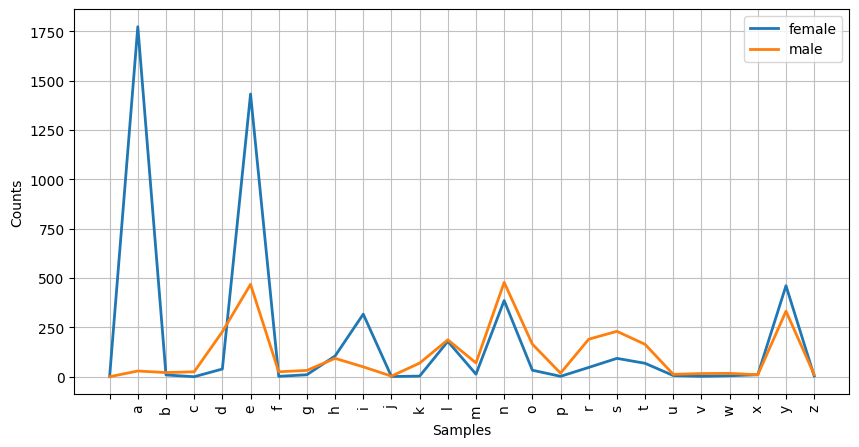

<Axes: xlabel='Samples', ylabel='Counts'>

In [594]:
plt.figure(figsize=(10,5))
cfd_name.plot()

### a pronouncing dictionary

In [595]:
entries = nltk.corpus.cmudict.entries()

In [596]:
entries

[('a', ['AH0']), ('a.', ['EY1']), ('a', ['EY1']), ...]

In [597]:
type(entries)

nltk.corpus.reader.util.StreamBackedCorpusView

In [599]:
for entry in entries[34123:34130]:
    print(entry)

('downtown', ['D', 'AW1', 'N', 'T', 'AW1', 'N'])
("downtown's", ['D', 'AW1', 'N', 'T', 'AW1', 'N', 'Z'])
('downtowns', ['D', 'AW1', 'N', 'T', 'AW1', 'N', 'Z'])
('downtrend', ['D', 'AW1', 'N', 'T', 'R', 'EH2', 'N', 'D'])
('downtrodden', ['D', 'AW2', 'N', 'T', 'R', 'AA1', 'D', 'AH0', 'N'])
('downturn', ['D', 'AW1', 'N', 'T', 'ER2', 'N'])
('downturns', ['D', 'AW1', 'N', 'T', 'ER2', 'N', 'Z'])


In [611]:
for entry in entries:
    word,pron = entry
    if word[-1]=='n' and pron[-1]=='M':
        print(entry)

('autumn', ['AO1', 'T', 'AH0', 'M'])
('column', ['K', 'AA1', 'L', 'AH0', 'M'])
('condemn', ['K', 'AH0', 'N', 'D', 'EH1', 'M'])
('damn', ['D', 'AE1', 'M'])
('goddamn', ['G', 'AA1', 'D', 'D', 'AE2', 'M'])
('hymn', ['HH', 'IH1', 'M'])
('solemn', ['S', 'AA1', 'L', 'AH0', 'M'])
